
# SOCIODEMOGRAPHIC

## sociodemographic.csv
|Variable|Explicación|
|---|---|
|*age*| Edad del cliente
|*country_id*| País de residencia del cliente
|*deceased*| Fallecido. N/S
|*gender*| Sexo del cliente
|*region_code*| Provincia de residencia del cliente (para ES)
|*salary*| Ingresos brutos de la unidad familiar

In [9]:
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Spectral")
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Cargar el archivo parquet
df_full = pd.read_parquet("C:/Users/Bobby/Desktop/Master Data Analysis/TFM/easyMoney_fintech/data/df_completo.parquet")
#df_full = pd.read_parquet("/Users/claudiacastro/Desktop/df_completo.parquet")

# eliminamos columnas que no aportan información
df_full = df_full.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], axis=1)

# Ordenar df_full por pk_cid y pk_partition
df_full = df_full.sort_values(by=['pk_cid', 'pk_partition'])

# Modificamos el tipo de dato de las columnas, SIMPLEMENTE CAMBIA EL TIPO DE DATO
df_full["pk_partition"] = pd.to_datetime(df_full["pk_partition"])
df_full["entry_date"] = pd.to_datetime(df_full["entry_date"], errors='coerce')
df_full["entry_channel"] = df_full["entry_channel"].astype('category')
df_full['active_customer'] = df_full['active_customer'].astype('int32')
df_full['segment'] = df_full['segment'].astype('category')
df_full['short_term_deposit'] = df_full['short_term_deposit'].astype('int32')
df_full['loans'] = df_full['loans'].astype('int32')
df_full['mortgage'] = df_full['mortgage'].astype('int32')
df_full['funds'] = df_full['funds'].astype('int32')
df_full['securities'] = df_full['securities'].astype('int32')
df_full['long_term_deposit'] = df_full['long_term_deposit'].astype('int32')
df_full['credit_card'] = df_full['credit_card'].astype('int32')
# df_full['payroll'] = df_full['payroll'].astype('int32')
# df_full['pension_plan'] = df_full['pension_plan'].astype('int32')
df_full['payroll_account'] = df_full['payroll_account'].astype('int32')
df_full['emc_account'] = df_full['emc_account'].astype('int32')
df_full['debit_card'] = df_full['debit_card'].astype('int32')
df_full['em_account_p'] = df_full['em_account_p'].astype('int32')
df_full['em_acount'] = df_full['em_acount'].astype('int32')
df_full["country_id"] = df_full["country_id"].astype('category')
df_full["region_code"] = df_full["region_code"].astype('category')
df_full["gender"] =  df_full["gender"].astype('category')
df_full["age"] = df_full["age"].astype('int32')

## Análisis Preliminar

In [11]:
def build_my_info_table(df):
    # Seleccionar las columnas numéricas del DataFrame
    numerical_columns = df.select_dtypes(include=[np.number])
    
    # Crear un DataFrame con información detallada sobre las columnas
    df_info = pd.DataFrame({
        # Nombre de la columna
        'column':   [col             for col in df.columns],
        # Tipo de datos de la columna
        'dtype':    [df[col].dtype   for col in df.columns],
        # Número de valores no nulos en la columna
        'count':    [df[col].count() for col in df.columns],
        
        # Estadísticas descriptivas para columnas numéricas
        'mean':     [round(df[col].mean(), 1)         if col in numerical_columns else '' for col in df.columns],
        'std':      [round(df[col].std(), 1)          if col in numerical_columns else '' for col in df.columns],
        'min':      [round(df[col].min(), 1)          if col in numerical_columns else '' for col in df.columns],
        '25%':      [round(df[col].quantile(0.25), 1) if col in numerical_columns else '' for col in df.columns],
        '50%':      [round(df[col].median(), 1)       if col in numerical_columns else '' for col in df.columns],
        '75%':      [round(df[col].quantile(0.75), 1) if col in numerical_columns else '' for col in df.columns],
        'max':      [round(df[col].max(), 1)          if col in numerical_columns else '' for col in df.columns],
        
        # Número de valores únicos en la columna
        'nunique':  [df[col].nunique()                                          for col in df.columns],
        
        # Lista de valores únicos si el número de valores únicos es menor que 30, de lo contrario, cadena vacía
        'unique':   [list(df[col].unique()) if df[col].nunique() < 10 else ''   for col in df.columns],
        
        # Porcentaje de cardinalidad (número de valores únicos)
        'cardinality %': [round(df[col].nunique() / df.shape[0] * 100, 1)      for col in df.columns],
        
        # Moda (valor más frecuente) en la columna
        'mode':     [df[col].mode()[0]                                          for col in df.columns],
        
        # Porcentaje de ocurrencias de la moda en la columna
        'mode %':   [round(df[col].value_counts().max() * 100 / df.shape[0], 1) for col in df.columns],
        
        # Número de valores nulos en la columna
        'null_count': [df[col].isnull().sum() for col in df.columns],
        
        # Porcentaje de valores nulos en la columna
        'null %':   [round(df[col].isnull().mean() * 100, 1)                    for col in df.columns],
    })
    return df_info

In [12]:
# Crear un nuevo DataFrame df_soc con las columnas específicas
columnas_a_seleccionar = ['pk_cid', 'pk_partition', 'age', 'country_id', 'deceased', 'gender', 'region_code', 'salary']
df_soc = df_full[columnas_a_seleccionar]

df_soc.head()

,pk_cid,pk_partition,age,country_id,deceased,gender,region_code,salary
1479563,15891,2018-07-28,59,ES,N,H,28.000,NaN
2168122,15891,2018-08-28,59,ES,N,H,28.000,NaN
2962973,16063,2018-11-28,62,ES,N,H,28.000,NaN
3628236,16063,2018-12-28,62,ES,N,H,28.000,NaN
4028169,16063,2019-01-28,62,ES,N,H,28.000,NaN


In [13]:
df_soc.isna().sum()

pk_cid                0
pk_partition          0
age                   0
country_id            0
deceased              0
gender               25
region_code        2264
salary          1512103
dtype: int64

### Tabla de Información General

In [14]:
# Crear tabla de info.
df_soc_info = build_my_info_table(df_soc)

# Aplicar el estilo de gradiente de color.
styled_soc_df = df_soc_info.style.background_gradient(cmap='Reds', axis=0)

# Agregar estilos para hacer la tabla scrolleable y fijar los encabezados.
styled_soc_df = styled_soc_df.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('position', 'sticky'), ('top', '0'), ('background-color', 'black'), ('z-index', '1')]
    }, {
        'selector': 'tbody',
        'props': [('display', 'block'), ('max-height', '400px'), ('overflow-y', 'scroll'), ('overflow-x', 'auto')]
    }, {
        'selector': 'thead, tbody tr',
        'props': [('display', 'table'), ('width', '100%'), ('table-layout', 'fixed')]
    }, {
        'selector': 'th, td',
        'props': [('word-wrap', 'break-word'), ('white-space', 'pre-wrap'), ('max-width', '150px')]
    }]
)

# Mostrar la tabla.
styled_soc_df

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique,cardinality %,mode,mode %,null_count,null %
0,pk_cid,int64,5962924,1234929.800000,162302.000000,15891,1112532.000000,1231097.000000,1352339.000000,1553689,456373,,7.700000,17457,0.000000,0,0.000000
1,pk_partition,datetime64[ns],5962924,,,,,,,,17,,0.000000,2019-05-28 00:00:00,7.400000,0,0.000000
2,age,int32,5962924,29.800000,12.000000,2,22.000000,25.000000,34.000000,105,104,,0.000000,22,12.200000,0,0.000000
3,country_id,category,5962924,,,,,,,,41,,0.000000,ES,100.000000,0,0.000000
4,deceased,object,5962924,,,,,,,,2,"['N', 'S']",0.000000,N,100.000000,0,0.000000
5,gender,category,5962899,,,,,,,,2,"['H', 'V', nan]",0.000000,H,51.800000,25,0.000000
6,region_code,category,5960660,,,,,,,,52,,0.000000,28.000000,19.900000,2264,0.000000
7,salary,float64,4450821,115816.700000,199551.900000,1202.700000,61500.600000,88654.600000,131669.900000,28894395.500000,258629,,4.300000,451931.220000,0.000000,1512103,25.400000


Haciendo un análisis preliminar de los resultados obtenidos en la tabla, podemos extraer laas siguientes conclusiones:

 - Se observan valores nulos en las variables de género, region_code & salary, estudiaremos como imputarlas más adelante.
 - Se observa una vairabilidad aceptable en todas las categoráis, a excepción de country (donde predomina España en casi un 100%) y deceased (practicamente ningún cliente fallecido).

## Mes pk_partition

In [15]:
# 'pk_partitions' formato de fecha
df_full['pk_partition'] = pd.to_datetime(df_full['pk_partition'], errors='coerce')

# Extraer el mes de la columna 'pk_partitions' y crear una nueva columna 'mes'
df_full['mes_partition'] = df_full['pk_partition'].dt.month

# Extraer también el nombre del mes:
df_full['mes_nombre_partition'] = df_full['pk_partition'].dt.strftime('%B')

Usaremos groupby() para obtener la última partición (pk_partition) y tener una visión actual de la empresa

In [20]:
# Filtrar el DataFrame para obtener solo los datos de la última ingesta
latest_date = '2019-05-28'
df_last_partition = df_full[df_full['pk_partition'] == latest_date]

## AGE

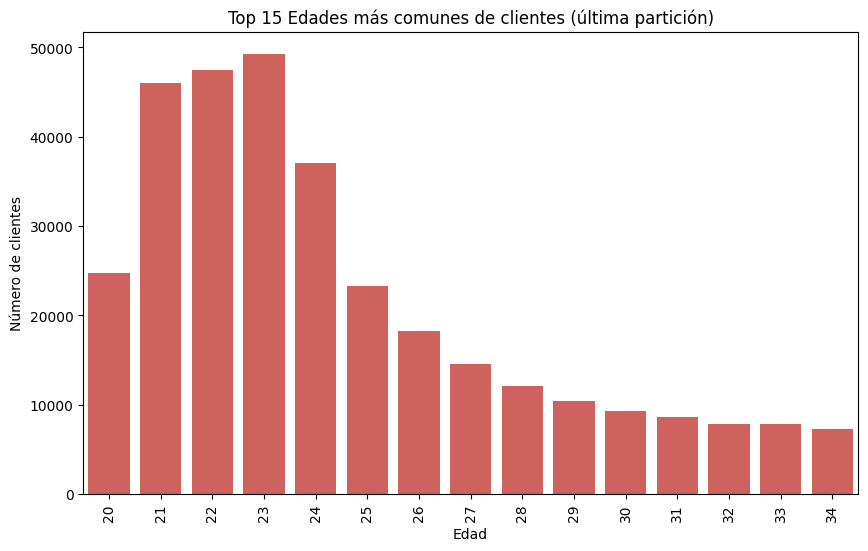

In [22]:
# Contar la distribución de valores en 'age' para la última partición
age_data = df_last_partition['age'].value_counts().reset_index()
age_data.columns = ['age', 'count']

# Filtrar las 15 edades más repetidas
top_15_ages = age_data.nlargest(15, 'count')

# Calcular el porcentaje de cada valor
total_count = top_15_ages['count'].sum()
top_15_ages['percentage'] = (top_15_ages['count'] / total_count) * 100

# Crear el gráfico de barras para el top 15 de 'age'
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='age', y='count', data=top_15_ages)

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
plt.title('Top 15 Edades más comunes de clientes (última partición)')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [ ]:
# Contar cuántos valores únicos de 'age' tiene cada cliente
estado_por_cliente_age = df_full.groupby('pk_cid')['age'].nunique()

# Identificar clientes con edades mixtas (múltiples valores en 'age')
clientes_mixtos_age = estado_por_cliente_age[estado_por_cliente_age > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_age = df_full[~df_full['pk_cid'].isin(clientes_mixtos_age)]

# Identificar clientes que tienen siempre la misma edad
clientes_misma_edad = df_no_mixtos_age.groupby('pk_cid')['age'].nunique()
clientes_misma_edad = clientes_misma_edad[clientes_misma_edad == 1].index

# Identificar clientes con valores NaN en 'age' (excluyendo clientes mixtos)
clientes_con_nan_age = df_no_mixtos_age[df_no_mixtos_age['age'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_misma_edad = len(clientes_misma_edad)
n_con_nan_age = len(clientes_con_nan_age)
n_mixtos_age = len(clientes_mixtos_age)

# Mostrar los resultados
print(f"Clientes que tienen siempre la misma edad (excluyendo mixtos): {n_misma_edad}")
print(f"Clientes con valores NaN en 'age' (excluyendo mixtos): {n_con_nan_age}")
print(f"Clientes con edades mixtas (diferentes valores de edad): {n_mixtos_age}")

In [ ]:
n_total = n_misma_edad + n_con_nan_age + n_mixtos_age
n_total

In [ ]:
df_misma_edad = df_full[df_full['pk_cid'].isin(clientes_misma_edad)]
df_edad_mixta = df_full[df_full['pk_cid'].isin(clientes_mixtos_age)]

In [ ]:
df_misma_edad["age"].describe()

In [ ]:
df_edad_mixta["age"].describe()

aquí se tomará la decisión de trabajar con la última edad del cliente, también hay que considerar que hay valores entre 2 y 18 años que creo que no son adecuados para la ultilizacion de una aplicacion así y revisar tambien los valores mayores de 100 años.

(Adrián) Sí pueden ser datos reales, de hecho vamos a hacer algunas comprobaciones posteriores.

Vamos a buscar los clientes con edades anómalas, y que podrían ser objetos de una modificación. En este caso vamos a ver primero aquellos que se mantienen siempre con la misma edad, y además son menores

### Edad Constante

1. Identificar clientes con productos activos
Primero, filtramos el DataFrame clientes_misma_edad_menores para obtener los clientes que tienen algún producto activo (donde el valor es 1).

In [ ]:
# Filtrar clientes que siempre tienen la misma edad y esa edad es menor a 18 años
clientes_misma_edad_menores = df_misma_edad[df_misma_edad['age'] < 18]

# Mostrar los resultados
clientes_misma_edad_menores

In [ ]:
# Lista de productos a analizar
productos = [
    'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
    'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll', 
    'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 
    'em_account_p', 'em_acount'
]

# Contar el número de casos donde cada producto ha sido contratado (valor = 1)
conteo_productos = clientes_misma_edad_menores[productos].sum()

# Mostrar el resultado
conteo_productos

In [ ]:
pd.set_option('display.max_columns', None)

# Filtrar los clientes que tienen productos activos
clientes_con_productos_activos = clientes_misma_edad_menores[clientes_misma_edad_menores[productos].sum(axis=1) > 0]

# Mostrar el resultado
clientes_con_productos_activos

2. Repetir el proceso para los active_customer

In [ ]:
# Filtrar los clientes menores de 18 años que también son active_customer
clientes_menores_active = clientes_misma_edad_menores[clientes_misma_edad_menores['active_customer'] == 1]

# Contar cuántos clientes cumplen con ambas condiciones
cantidad_menores_active = clientes_menores_active.shape[0]

# Mostrar la cantidad
print(f"Cantidad de clientes menores de 18 años que son active_customer: {cantidad_menores_active}")

# Mostrar la lista de estos clientes
clientes_menores_active

### Edad Mixta

En este apartado vamos a corregir errores de tipidficación en la variable Edad. Para ello, vamos a identificar en primer lugar casos en los que la edad tenga saltos mayores de 3 años (dado que el rango máximo de variación para un cliente debería ser este, pues la serie se compone de 3 años), y por otro lado, vamos a identificar aquellos casos en los que se produzca una variación negativa 

In [ ]:
# Asegúrate de que df_edad_mixta esté ordenado por pk_cid y un índice de tiempo o la posición de las filas.
df_edad_mixta = df_edad_mixta.sort_values(by=['pk_cid', 'pk_partition'])  # Asumiendo que pk_partition representa el tiempo.

# Calcular la diferencia entre la primera y la última edad para cada usuario
df_edad_mixta['dif_edad'] = df_edad_mixta.groupby('pk_cid')['age'].transform(lambda x: x.iloc[-1] - x.iloc[0])

# Mostrar el resultado
df_edad_mixta[['pk_cid', 'age', 'dif_edad']].drop_duplicates()

#### Edad Mixta. Variación > 3 años

In [ ]:
df_edad_mixta_dif_mas3 = df_edad_mixta[df_edad_mixta['dif_edad'] > 3]

df_edad_mixta_dif_mas3["dif_edad"].describe()

In [ ]:
df_edad_mixta[df_edad_mixta['dif_edad'] > 60]

In [ ]:
df_edad_mixta[(df_edad_mixta['dif_edad'] > 3) & (df_edad_mixta['dif_edad'] < 6)]

En este caso, vamos a sustituir todos los valores de Age por el último valor conocido, ya que, a futuro lo más coherente será crear categorías de edad en las que se agrupen distintas décadas, por tanto, las variaciones internas de cada cliente van a ser practicamente irrelevantes (si un cliente pasa de 30-33 no es diferenciador), y además, se sobreentiende que los errores de tipificación se corrigen con el tiempo, por tanto, cuanto más reciente sea una entrada, más probable es que sea correcta.

In [ ]:
# Paso 1: Filtrar los individuos que cumplen la condición dif_edad > 3
df_edad_mixta_dif_mas3 = df_edad_mixta[df_edad_mixta['dif_edad'] > 3]

# Paso 2: Obtener la última edad registrada (en la última pk_partition) para cada individuo
ultima_edad_por_individuo = df_edad_mixta_dif_mas3.groupby('pk_cid').apply(lambda x: x.loc[x['pk_partition'].idxmax(), 'age'])

# Paso 3: Actualizar la edad en df_full para los individuos que cumplen la condición
def actualizar_edad(row):
    if row['pk_cid'] in ultima_edad_por_individuo.index:
        return ultima_edad_por_individuo[row['pk_cid']]
    else:
        return row['age']

# Aplicar la función para actualizar la edad en df_full
df_full['age'] = df_full.apply(actualizar_edad, axis=1)

# Mostrar el resultado
df_full.head()

#### Edad Mixta. Variación Negativa

In [ ]:
# Filtrar los casos donde la diferencia de edad es menor que 0
df_dif_edad_neg = df_edad_mixta[df_edad_mixta['dif_edad'] < 0]

df_dif_edad_neg["dif_edad"].describe()

In [ ]:
# Visualizar los casos donde la diferencia de edad es menor que 0
df_dif_edad_neg

In [ ]:
df_dif_edad_neg[df_dif_edad_neg['dif_edad'] < -1]

De igual forma vamos a sustituir todas las edades de los casos con variaciones negativas por la edad que figure en la última entrada de cada usuario

In [ ]:
# Paso 1: Obtener la última edad registrada (en la última pk_partition) para cada individuo
ultima_edad_por_individuo_neg = df_dif_edad_neg.groupby('pk_cid').apply(lambda x: x.loc[x['pk_partition'].idxmax(), 'age'])

# Paso 2: Actualizar la edad en df_full para los individuos que cumplen la condición
def actualizar_edad_neg(row):
    if row['pk_cid'] in ultima_edad_por_individuo_neg.index:
        return ultima_edad_por_individuo_neg[row['pk_cid']]
    else:
        return row['age']

# Aplicar la función para actualizar la edad en df_full
df_full['age'] = df_full.apply(actualizar_edad_neg, axis=1)

## COUNTRY ID

In [ ]:
# Contar cuántos valores únicos de 'country_id' tiene cada cliente
estado_por_cliente_country = df_full.groupby('pk_cid')['country_id'].nunique()

# Identificar clientes con 'country_id' mixtos (múltiples valores de 'country_id')
clientes_mixtos_country = estado_por_cliente_country[estado_por_cliente_country > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_country = df_full[~df_full['pk_cid'].isin(clientes_mixtos_country)]

# Identificar clientes que tienen siempre el mismo 'country_id'
clientes_mismo_country = df_no_mixtos_country.groupby('pk_cid')['country_id'].nunique()
clientes_mismo_country = clientes_mismo_country[clientes_mismo_country == 1].index

# Identificar clientes con valores NaN en 'country_id' (excluyendo clientes mixtos)
clientes_con_nan_country = df_no_mixtos_country[df_no_mixtos_country['country_id'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_mismo_country = len(clientes_mismo_country)
n_con_nan_country = len(clientes_con_nan_country)
n_mixtos_country = len(clientes_mixtos_country)

# Mostrar los resultados
print(f"Clientes que tienen siempre el mismo 'country_id' (excluyendo mixtos): {n_mismo_country}")
print(f"Clientes con valores NaN en 'country_id' (excluyendo mixtos): {n_con_nan_country}")
print(f"Clientes con 'country_id' mixtos (diferentes países): {n_mixtos_country}")

Los clientes con country id distintos como que antes vivian en un pais y ahora se han mudado para otro, no sé como tratar esto, si mantener el ultimo o el primero. (Adrián) Yo no los cambiaría, la variable indica país de residencia, por tanto, puede ser variable, y son muy pocos casos, no creo que supongan una distorsión de resultados

In [ ]:
# Lista de valores únicos en la columna 'country_id'
df_full['country_id'].value_counts()

In [ ]:
# Filtrar el DataFrame para obtener las filas donde el país es mixto
df_full[df_full['pk_cid'].isin(clientes_mixtos_country)]


### Country_ID Mixto

En este caso también vamos a modificar los casos de clientes con un country_id mixto en el DataFrame df_full, y asignarles el último país registrado para su pk_cid, ya que al tratarse solo de 25 clientes, todo parece indicar que se trata de errores en la toma de datos. Además, suponiendo que estos cambios de residencia fueran reales, entonces el salario debería sufrir modificaciones, situación que no se observa en ninguno de los casos. Por tanto, nos vamos a quedar con la información más actualizada de cada individuo

In [ ]:
# Obtener el último valor de 'country_id' para cada cliente mixto
ultimo_country_por_cliente = df_full[df_full['pk_cid'].isin(clientes_mixtos_country)].groupby('pk_cid').apply(lambda x: x.loc[x['pk_partition'].idxmax(), 'country_id'])

In [ ]:
# Función para actualizar el country_id según la última entrada
def actualizar_country_mixto(row):
    if row['pk_cid'] in ultimo_country_por_cliente.index:
        return ultimo_country_por_cliente[row['pk_cid']]
    else:
        return row['country_id']

# Aplicar la función para actualizar el country_id en df_full
df_full['country_id'] = df_full.apply(actualizar_country_mixto, axis=1)

# Verificar los cambios en los clientes mixtos
df_mixtos_actualizados_country = df_full[df_full['pk_cid'].isin(clientes_mixtos_country)]

# Mostrar algunos resultados para verificar
df_mixtos_actualizados_country.head(10)

## DECEASED

In [ ]:
# Contar cuántos valores únicos de 'deceased' tiene cada cliente
estado_por_cliente_deceased = df_full.groupby('pk_cid')['deceased'].nunique()

# Identificar clientes con estados mixtos (N y S o con NaN incluido)
clientes_mixtos_deceased = estado_por_cliente_deceased[estado_por_cliente_deceased > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_deceased = df_full[~df_full['pk_cid'].isin(clientes_mixtos_deceased)]

# Identificar clientes que son siempre 'N'
clientes_siempre_n = df_no_mixtos_deceased[df_no_mixtos_deceased['deceased'] == 'N']['pk_cid'].unique()

# Identificar clientes que son siempre 'S'
clientes_siempre_s = df_no_mixtos_deceased[df_no_mixtos_deceased['deceased'] == 'S']['pk_cid'].unique()

# Identificar clientes con valores NaN en 'deceased' (excluyendo clientes mixtos)
clientes_con_nan_deceased = df_no_mixtos_deceased[df_no_mixtos_deceased['deceased'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_siempre_n = len(clientes_siempre_n)
n_siempre_s = len(clientes_siempre_s)
n_con_nan_deceased = len(clientes_con_nan_deceased)
n_mixtos_deceased = len(clientes_mixtos_deceased)

# Mostrar los resultados
print(f"Clientes que son siempre 'N' en 'deceased' (excluyendo mixtos): {n_siempre_n}")
print(f"Clientes que son siempre 'S' en 'deceased' (excluyendo mixtos): {n_siempre_s}")
print(f"Clientes con valores NaN en 'deceased' (excluyendo mixtos): {n_con_nan_deceased}")
print(f"Clientes con estados mixtos en 'deceased' (N, S o NaN): {n_mixtos_deceased}")

In [ ]:
n_total = n_siempre_n + n_siempre_s + n_con_nan_deceased + n_mixtos_deceased
n_total

hay 55 clientes muertos desde la primera ingesta de datos incluido el entry_date, serán errores o se tendrán que analizar mas a fondo así como los que cambian

### Deceased Constante

In [ ]:
# Filtrar los clientes que son siempre 'S' en 'deceased'
df_siempre_s = df_full[df_full['pk_cid'].isin(clientes_siempre_s)]

# Ahora muestra la tabla completa para los clientes que son siempre 'S' en 'deceased'
df_siempre_s['age'].value_counts()

### Deceased Mixto

In [ ]:
# Filtrar los clientes que tienen estados mixtos en 'deceased'
df_mixtos_deceased = df_full[df_full['pk_cid'].isin(clientes_mixtos_deceased)]

df_mixtos_deceased['age'].value_counts()

Como podemos comprobar, por un lado, la variable deceased tiene una variabilidad practicamente despreciable, por tanto, es lógico pensar que dicha variable no va a tener una capacidad explicativa suficiente.

No vamos a tener en cuenta la variable deceased para hacer modelos al no tener ninguna capacidad predictiva ni explicativa.

Además dada su alta correlación con otras variables como el grupo de edad, es prudente elimiarla en los modleos para no caer en problemas de multicolinealidad entre las variables explicativas

## GENDER

In [ ]:
# se crea una categoria Unknown para los valores nulos
df_full["gender"] = df_full["gender"].cat.add_categories(["Unknown"]).fillna("Unknown")

df_full.groupby("gender")["pk_cid"].nunique().apply(lambda x: x/df_full["pk_cid"].nunique()*100)

In [ ]:
df_full.groupby("gender")["pk_cid"].nunique()

In [ ]:
df_full.groupby("gender")["pk_cid"].nunique().sum()
# se observa que hay 41 valores más que la cantidad de clientes únicos
# lo que representa que hay clientes con más de un género asignado

### Análisis Géneros

In [ ]:

# Contar cuántos valores únicos tiene cada cliente en la columna gender
estado_por_cliente_gender = df_full.groupby('pk_cid')['gender'].agg(['nunique', 'count'])

# Identificar clientes con géneros mixtos (H y F o Unknown)
clientes_mixtos_gender = estado_por_cliente_gender[estado_por_cliente_gender['nunique'] > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_gender = df_full[~df_full['pk_cid'].isin(clientes_mixtos_gender)]

# Identificar clientes que son siempre 'H'
clientes_siempre_H = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == 'H']['pk_cid'].unique()

# Identificar clientes que son siempre 'V'
clientes_siempre_V = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == 'V']['pk_cid'].unique()

# Identificar clientes "Unknown" en gender (excluyendo clientes mixtos)
clientes_siempre_Unknown = df_no_mixtos_gender[df_no_mixtos_gender['gender'] == "Unknown"]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_siempre_H = len(clientes_siempre_H)
n_siempre_V = len(clientes_siempre_V)
n_siempre_Unknown = len(clientes_siempre_Unknown)
n_mixtos_gender = len(clientes_mixtos_gender)

# Mostrar los resultados
print(f"Clientes que son siempre 'H' en 'gender' (excluyendo mixtos): {n_siempre_H}")
print(f"Clientes que son siempre 'V' en 'gender' (excluyendo mixtos): {n_siempre_V}")
print(f"Clientes que son todo 'Unknown' (excluyendo mixtos): {n_siempre_Unknown}")
print(f"Clientes con géneros mixtos (H y V o Unknown): {n_mixtos_gender}")
print(f"Total de clientes en el dataset: {n_siempre_H + n_siempre_V + n_siempre_Unknown + n_mixtos_gender}")


In [ ]:
# Poroporciones
n_total = n_siempre_H + n_siempre_V + n_siempre_Unknown + n_mixtos_gender
p_siempre_H = n_siempre_H / n_total * 100
p_siempre_V = n_siempre_V / n_total * 100
p_siempre_Unknown = n_siempre_Unknown / n_total * 100
p_mixtos_gender = n_mixtos_gender / n_total * 100

# Mostrar los resultados
print(f"Clientes que son siempre 'H': {p_siempre_H:.2f}%")
print(f"Clientes que son siempre 'V': {p_siempre_V:.2f}%")
print(f"Clientes que son todo 'Unknown': {p_siempre_Unknown:.5f}%")
print(f"Clientes con géneros mixtos (H y V o Unknown): {p_mixtos_gender:.3f}%")

### Género unknown constante

In [ ]:
# Clientes donde el valor de 'gender' es 'Unknown'
df_full[df_full['gender'] == "Unknown"]

In [ ]:
# Reemplazar el valor 'Unknown' por 'H' en la columna 'gender'
df_full.loc[df_full['gender'] == "Unknown", 'gender'] = "H"

Vamos a imputar los Unknown y los vamos a cambiar por Hombre, ya que, ambos individuos superan los 70 años (sería extraño que se identiffiquen como género fluido y la variable H es la que presenta mayor proporción, por tanto lo imputaremos a esta)

### Género Unknown Mixto

In [ ]:
# Aplicar el método ffill y bfill para imputar Unknown dentro de cada grupo
df_full['gender'] = df_full.groupby('pk_cid')['gender'].transform(lambda x: x.ffill().bfill())

# Verificar si hay todavía valores Unknown después de la imputación
unknown_after = df_full[df_full['gender'] == "Unknown"]

print(f"Número de valores 'Unknown' después de la imputación: {len(unknown_after)}")


### Géneros Mixtos

También vamos a modificar los casos en lso que el género es mixto, tomando el último valor registrado para cada individuo, ya que como hemos apuntado anteriormente, es lógico pensar que la última entrada de cada cliente es la más actualizada, y por tanto, la correcta

In [ ]:
# Obtener el último valor de 'gender' para cada cliente mixto
ultimo_genero_por_cliente = df_full[df_full['pk_cid'].isin(clientes_mixtos_gender)].groupby('pk_cid').apply(lambda x: x.loc[x['pk_partition'].idxmax(), 'gender'])

In [ ]:
# Función para actualizar el género según la última entrada
def actualizar_genero_mixto(row):
    if row['pk_cid'] in ultimo_genero_por_cliente.index:
        return ultimo_genero_por_cliente[row['pk_cid']]
    else:
        return row['gender']

# Aplicar la función para actualizar el género en df_full
df_full['gender'] = df_full.apply(actualizar_genero_mixto, axis=1)

# Verificar los cambios en los clientes mixtos
df_mixtos_actualizados = df_full[df_full['pk_cid'].isin(clientes_mixtos_gender)]

In [ ]:
# Mostrar algunos resultados para verificar
df_mixtos_actualizados.head(20)

## REGION_CODE


In [ ]:
# valores nulos en region_code ponerlos como Unknown
df_full["region_code"] = df_full["region_code"].cat.add_categories(["Unknown"]).fillna("Unknown")

In [ ]:
# Contar cuántos valores únicos de 'region_code' tiene cada cliente
estado_por_cliente_region = df_full.groupby('pk_cid')['region_code'].nunique()

# Identificar clientes con múltiples códigos de región (cambios de región)
clientes_mixtos_region = estado_por_cliente_region[estado_por_cliente_region > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_region = df_full[~df_full['pk_cid'].isin(clientes_mixtos_region)]

# Identificar clientes que tienen siempre el mismo código de región
clientes_mismo_region = df_no_mixtos_region.groupby('pk_cid')['region_code'].nunique()
clientes_mismo_region = clientes_mismo_region[clientes_mismo_region == 1].index

# Identificar clientes con valores NaN en 'region_code' (excluyendo clientes mixtos)
clientes_con_nan_region = df_no_mixtos_region[df_no_mixtos_region['region_code'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_mismo_region = len(clientes_mismo_region)
n_con_nan_region = len(clientes_con_nan_region)
n_mixtos_region = len(clientes_mixtos_region)

# Mostrar los resultados
print(f"Clientes que tienen siempre el mismo código de región (excluyendo mixtos): {n_mismo_region}")
print(f"Clientes con valores NaN en 'region_code' (excluyendo mixtos): {n_con_nan_region}")
print(f"Clientes con códigos de región mixtos (diferentes códigos): {n_mixtos_region}")

In [ ]:
# se comprueba que la suma de los clientes en cada región es igual a la cantidad de clientes únicos
n_total = n_mismo_region + n_con_nan_region + n_mixtos_region
n_total 

In [ ]:
df_full[df_full["region_code"] == 'Unknown']

In [ ]:
# Filtra el DataFrame según las condiciones especificadas
filtered_df = df_full[(df_full["region_code"] == 'Unknown') & (df_full["country_id"] == 'ES')]

filtered_df

### Sustitución de region 'Unknowns'

Vamos a sustituir region_code por 28 en estos casos, al ser Madrid la región más repetida, y por 00 en los casos de fuera de España

In [ ]:
# Verificar las categorías actuales
print("Categorías actuales:", df_full['region_code'].cat.categories)

# Agregar nuevas categorías
df_full['region_code'] = df_full['region_code'].cat.add_categories(['28', '00'])

# Aplicar las actualizaciones
df_full.loc[(df_full["region_code"] == 'Unknown') & (df_full["country_id"] == 'ES'), "region_code"] = '28'
df_full.loc[(df_full["region_code"] == 'Unknown') & (df_full["country_id"] != 'ES'), "region_code"] = '00'

# Verifica si quedan valores 'Unknown'
unknown_rows = df_full[df_full["region_code"] == 'Unknown']

unknown_rows

### Sustitución Region_Codes - Provincia

In [ ]:
# Diccionario de mapeo de códigos de provincia a nombres de provincia

provincia_mapping = {
    00: "Extranjero",1: "Álava",2: "Albacete",3: "Alicante",4: "Almería",5: "Ávila",6: "Badajoz",7: "Baleares, Islas",
    8: "Barcelona",9: "Burgos",10: "Cáceres",11: "Cádiz",12: "Castellón",13: "Ciudad Real",14: "Córdoba",15: "Coruña, A",
    16: "Cuenca",17: "Girona",18: "Granada",19: "Guadalajara",20: "Gipuzkoa",21: "Huelva",22: "Huesca",23: "Jaén",24: "León",
    25: "Lleida",26: "Rioja, La",27: "Lugo",28: "Madrid",29: "Málaga",30: "Murcia",31: "Navarra",32: "Ourense",33: "Asturias",
    34: "Palencia",35: "Palmas, Las",36: "Pontevedra",37: "Salamanca",38: "Santa Cruz de Tenerife",39: "Cantabria",40: "Segovia",
    41: "Sevilla",42: "Soria",43: "Tarragona",44: "Teruel",45: "Toledo",46: "Valencia",47: "Valladolid",48: "Bizkaia",49: "Zamora",
    50: "Zaragoza",51: "Ceuta",52: "Melilla"}

In [ ]:
# Mapear los códigos de 'region_code' a nombres de provincia
df_full['region_code'] = df_full['region_code'].map(provincia_mapping)

# Verificar que la sustitución se realizó correctamente
print(df_full[['region_code']].drop_duplicates())

In [ ]:
# Sustituir los valores NaN en 'region_code' por 'extranjero'
df_full['region_code'] = df_full['region_code'].fillna('Extranjero')

# Verificar que la sustitución se realizó correctamente
print(df_full['region_code'].unique())

## SALARY

In [ ]:
# Contar cuántos valores únicos de 'salary' tiene cada cliente
estado_por_cliente_salary = df_full.groupby('pk_cid')['salary'].nunique()

# Identificar clientes con múltiples valores de salario (cambios en el salario)
clientes_mixtos_salary = estado_por_cliente_salary[estado_por_cliente_salary > 1].index

# Excluir los clientes mixtos del análisis de las otras categorías
df_no_mixtos_salary = df_full[~df_full['pk_cid'].isin(clientes_mixtos_salary)]

# Identificar clientes que tienen siempre el mismo salario
clientes_mismo_salary = df_no_mixtos_salary.groupby('pk_cid')['salary'].nunique()
clientes_mismo_salary = clientes_mismo_salary[clientes_mismo_salary == 1].index

# Identificar clientes con valores NaN en 'salary' (excluyendo clientes mixtos)
clientes_con_nan_salary = df_no_mixtos_salary[df_no_mixtos_salary['salary'].isna()]['pk_cid'].unique()

# Contar el número de clientes en cada categoría (excluyendo mixtos)
n_mismo_salary = len(clientes_mismo_salary)
n_con_nan_salary = len(clientes_con_nan_salary)
n_mixtos_salary = len(clientes_mixtos_salary)

# Mostrar los resultados
print(f"Clientes que tienen siempre el mismo salario: {n_mismo_salary}")
print(f"Clientes con valores NaN en 'salary' en todas las ingestas: {n_con_nan_salary}")
print(f"Clientes con valores de salario mixtos, varían con la ingesta de datos (diferentes valores): {n_mixtos_salary}")

In [ ]:
df_full["salary"].describe()

### Imputación de Nan

In [ ]:
# Filtrar los registros donde 'salary' es NaN
casos_salary_nan = df_full[df_full['salary'].isna()]

casos_salary_nan["country_id"].value_counts()

#### Creación Grupos de Edad

Como tenemos valores nulos de practicamente todos los países, se me ocurre aplicar el salario mediano pero atendiendo al grupo de edad del sujeto, país de residencia y actividad comercial.  Por tanto, en primer lugar vamos a segmentar en grupos de edad. La segmentación de edades más utilizada suele ser la siguiente:

Menores: eGrupo compuesto por personas menores de dieciocho años

Jóvenes: El grupo de jóvenes son las personas mayores a dieciocho años y menores de veinticinco años.

Adultos jóvenes: Este segmento incluye personas mayores de veinticinco años y menores de cuarenta años.

Adultos: Son las personas mayores de cuarenta años y menores a los cincuenta y cinco años.

Adultos mayores: Encontramos en este grupo a las personas mayores de cincuenta y cinco años y menores de sesenta y cinco.

Ancianos: Son las personas con más sesenta y cinco años y menos de setenta y cinco años.

Longevos: Son todas las personas de setenta y cinco años en adelante.

In [ ]:
# Definir función para categorizar según grupos de edad
def categorizar_edad(edad):
    if edad < 18:
        return 'Menores'
    elif 18 <= edad < 25:
        return 'Jóvenes'
    elif 25 <= edad < 40:
        return 'Adultos jóvenes'
    elif 40 <= edad < 55:
        return 'Adultos'
    elif 55 <= edad < 65:
        return 'Adultos mayores'
    elif 65 <= edad < 75:
        return 'Ancianos'
    else:
        return 'Longevos'

# Crear nueva columna 'grupo_edad' en el DataFrame
df_full['grupo_edad'] = df_full['age'].apply(categorizar_edad)

In [ ]:
df_full['grupo_edad'].value_counts()

In [ ]:
# Eliminar filas donde 'pk_cid' esté duplicado, quedándote solo con la primera aparición de cada 'pk_cid'
df_full_sin_duplicados = df_full.drop_duplicates(subset=['pk_cid'], keep='first')

In [ ]:
df_full_sin_duplicados.shape

In [ ]:
df_full_sin_duplicados['grupo_edad'].value_counts()

In [ ]:
# Filtrar el DataFrame para incluir solo aquellos con 'grupo_edad' igual a 'menores'
df_menores = df_full_sin_duplicados[df_full_sin_duplicados['grupo_edad'] == 'Menores']

# Calcular la mediana de la columna 'salary' para los menores
mediana_salary_menores = df_menores['salary'].median()

mediana_salary_menores

In [ ]:
df_menores['salary'].describe()

In [ ]:
df_menores['salary'].value_counts()

In [ ]:
# Filtrar las filas donde 'salary' no es null
df_menores_sin_na_salary = df_menores[df_menores['salary'].notna()]

df_menores_sin_na_salary

Vamos a hacer que la variable grupo edad sea constante para cada individuo, ya que entendemos que un cambio de grupo en un periodo de 3 años no va a suponer un cambio determinante en el patrón de comportamiento de cada cliente, además, si en ese periodo ha cambiado de un segmento a otro, entonces, quiere decir que estaba mucho más próximo al último grupo en cuestión

In [ ]:
# Agrupar por 'pk_cid' y obtener el último valor de 'grupo_edad' para cada 'pk_cid'
ultimo_grupo_edad = df_full.groupby('pk_cid')['grupo_edad'].last().reset_index()

# Renombrar la columna 'grupo_edad' en el DataFrame resultante para hacer el merge
ultimo_grupo_edad.rename(columns={'grupo_edad': 'ultimo_grupo_edad'}, inplace=True)

# Hacer un merge del DataFrame original con el DataFrame de los últimos valores
df_full = df_full.merge(ultimo_grupo_edad, on='pk_cid', how='left')

# Actualizar la columna 'grupo_edad' con el último valor registrado
df_full['grupo_edad'] = df_full['ultimo_grupo_edad']

# Eliminar la columna temporal
df_full.drop(columns=['ultimo_grupo_edad'], inplace=True)

In [ ]:
df_full['salary'].describe()

Ahora que tenemos los grupos de edad definidos, podemos proceder a imputar los valores nulos de salary usando la mediana del salario dentro de cada segmento.

In [ ]:
# Reemplazar los valores NaN en la columna 'Segment' con '03 - UNIVERSITARIO'
df_full['segment'] = df_full['segment'].fillna('03 - UNIVERSITARIO')

#!!!!(Importante aquí calculamos la mediana sobre el conjunto sin duplicados, si no afecta a la mediana)!!!
# Calcular la mediana de 'salary' para cada combinación de país, región, grupo de edad y actividad comercial
mediana_salary = df_full_sin_duplicados.groupby(['country_id', 'grupo_edad', 'segment', 'region_code'])['salary'].median()

# Imputar los valores nulos de 'salary' con la mediana correspondiente
df_full['salary'] = df_full.apply(
    lambda row: mediana_salary[row['country_id'], row['grupo_edad'], row['segment'], row['region_code']]
    if pd.isna(row['salary']) else row['salary'], axis=1
)

In [ ]:
#!!!!(Importante aquí calculamos la mediana sobre el conjunto sin duplicados, si no afecta a la mediana)!!!
# Calcular la mediana de 'salary' para cada combinación de país, grupo de edad y actividad comercial
mediana_salary = df_full_sin_duplicados.groupby(['country_id', 'grupo_edad', 'segment'])['salary'].median()

# Imputar los valores nulos de 'salary' con la mediana correspondiente
df_full['salary'] = df_full.apply(
    lambda row: mediana_salary[row['country_id'], row['grupo_edad'], row['segment']]
    if pd.isna(row['salary']) else row['salary'], axis=1
)

In [ ]:
df_full["salary"].describe()

Categorizar edades:

La función categorizar_edad toma la edad y la clasifica en uno de los grupos definidos.

Luego, apply se utiliza para aplicar esta función a la columna age, creando una nueva columna grupo_edad en el DataFrame.

Calcular mediana:

groupby se utiliza para agrupar los datos por país (country_id), región (region_code), grupo de edad (grupo_edad), y actividad comercial (segment).

La mediana del salario para cada grupo se calcula y se almacena en mediana_salary.

Imputación:

Para cada fila, si el salario es nulo (NaN), se reemplaza con la mediana correspondiente calculada en el paso anterior.

In [ ]:
# Filtrar los registros donde 'salary' es NaN
casos_salary_nan = df_full[df_full['salary'].isna()]

# Mostrar los casos con 'salary' como NaN
casos_salary_nan

Comprobamos que siguen qeudando casos con salary = Nan, aunqueson bastante escasos 1749 filas, que se corresponden con 130 individuos, puede ser que para estos no haya grupos de referencia que cumplan con las mismas características establecidas. Como sigue habiendo datos con Salary Nan, vamos a rellenarlos con el salario mediano del grupo_edad y el country_id

In [ ]:
#!!!!(Importante aquí calculamos la mediana sobre el conjunto sin duplicados, si no afecta a la mediana)!!!
# Calcular la mediana del salario por grupo_edad y country_id
median_salary = df_full_sin_duplicados.groupby(['grupo_edad', 'country_id'])['salary'].median().reset_index()

# Renombrar la columna de salario mediano para mayor claridad
median_salary.rename(columns={'salary': 'median_salary'}, inplace=True)

# Combinar la mediana de salario con el DataFrame original
df_full = pd.merge(df_full, median_salary, on=['grupo_edad', 'country_id'], how='left')

# Rellenar los NaN en la columna salary con la mediana correspondiente
df_full['salary'].fillna(df_full['median_salary'], inplace=True)

# Eliminar la columna temporal de salario mediano si ya no es necesaria
df_full.drop(columns=['median_salary'], inplace=True)

# Verificar que no queden valores NaN en salary
nan_count = df_full['salary'].isna().sum()
print(f"Número de valores NaN restantes en 'salary': {nan_count}")

Por último, solo nos quedaremos con la media de country_id al ser una variable que intutivamente más influencia tendrá en los cambios de salario

In [ ]:
#!!!!(Importante aquí calculamos la mediana sobre el conjunto sin duplicados, si no afecta a la mediana)!!!
# Calcular la mediana del salario por country_id
median_salary = df_full_sin_duplicados.groupby(['country_id'])['salary'].median().reset_index()

# Renombrar la columna de salario mediano para mayor claridad
median_salary.rename(columns={'salary': 'median_salary'}, inplace=True)

# Combinar la mediana de salario con el DataFrame original
df_full = pd.merge(df_full, median_salary, on=['country_id'], how='left')

# Rellenar los NaN en la columna salary con la mediana correspondiente
df_full['salary'].fillna(df_full['median_salary'], inplace=True)

# Eliminar la columna temporal de salario mediano si ya no es necesaria
df_full.drop(columns=['median_salary'], inplace=True)

# Verificar que no queden valores NaN en salary
nan_count = df_full['salary'].isna().sum()
print(f"Número de valores NaN restantes en 'salary': {nan_count}")

In [ ]:
#!!!!(Importante aquí calculamos la mediana sobre el conjunto sin duplicados, si no afecta a la mediana)!!!
# Calcular la mediana del salario por grupo_edad
median_salary = df_full_sin_duplicados.groupby(['grupo_edad'])['salary'].median().reset_index()

# Renombrar la columna de salario mediano para mayor claridad
median_salary.rename(columns={'salary': 'median_salary'}, inplace=True)

# Combinar la mediana de salario con el DataFrame original
df_full = pd.merge(df_full, median_salary, on=['grupo_edad'], how='left')

# Rellenar los NaN en la columna salary con la mediana correspondiente
df_full['salary'].fillna(df_full['median_salary'], inplace=True)

# Eliminar la columna temporal de salario mediano si ya no es necesaria
df_full.drop(columns=['median_salary'], inplace=True)

# Verificar que no queden valores NaN en salary
nan_count = df_full['salary'].isna().sum()
print(f"Número de valores NaN restantes en 'salary': {nan_count}")

## DATASET LOG

In [ ]:
# Crear una lista de las columnas que deseas eliminar
columnas_a_eliminar = [
    'deceased', 'entry_date', 'entry_channel', 'active_customer', 
    'segment', 'short_term_deposit', 'loans', 'mortgage', 'funds', 
    'securities', 'long_term_deposit', 'em_account_pp', 'credit_card', 
    'payroll', 'pension_plan', 'payroll_account', 'emc_account', 
    'debit_card', 'em_account_p', 'em_acount'
]

# Crear una copia del DataFrame original y eliminar las columnas especificadas
sociodemographic_df_adrian = df_full.copy()
sociodemographic_df_adrian = sociodemographic_df_adrian.drop(columns=columnas_a_eliminar)

# Verificar las primeras filas del nuevo DataFrame para asegurarse de que las columnas se eliminaron correctamente
sociodemographic_df_adrian.head()

In [ ]:
df_full.to_csv('sociodemographic_df_adrian.csv', index=False)

In [ ]:
# Columnas de interés
columns_of_interest = ['pk_cid', 'pk_partition', 'country_id', 'region_code', 'gender', 'age', 'salary', 'grupo_edad']

# Comprobar valores NaN
nan_check = sociodemographic_df_adrian[columns_of_interest].isna().sum()

# Comprobar valores 'Unknown'
unknown_check = sociodemographic_df_adrian[columns_of_interest].applymap(lambda x: x == 'Unknown').sum()

# Mostrar resultados
print("Número de valores NaN por columna:")
print(nan_check)

print("\nNúmero de valores 'Unknown' por columna:")
print(unknown_check)

In [ ]:
# Guardar el DataFrame en un archivo parquet para subirlo a s3 de aws
#sociodemographic_df_adrian.to_parquet('sociodemographic_df_adrian.parquet', index=False)

### DASHBOARD DATASET

In [ ]:
# Crear una copia del DataFrame original y eliminar las columnas especificadas
dashboard_df_adrian = sociodemographic_df_adrian.copy()

# 1. Calcular la mediana del salario para cada individuo (pk_cid)
# Asumiendo que la columna de salario se llama 'salary'
mediana_salario = dashboard_df_adrian.groupby('pk_cid')['salary'].median().reset_index()

# Renombrar la columna de salario a 'median_salary'
mediana_salario.rename(columns={'salary': 'median_salary'}, inplace=True)

# 3. Eliminar la columna 'salary' del DataFrame y eliminar la columna 'age' del DataFrame
dashboard_df_adrian = dashboard_df_adrian.drop(columns=['salary'])
dashboard_df_adrian = dashboard_df_adrian.drop(columns=['age'])

# 3. Obtener el último valor de 'region_code' para cada individuo
# Asumiendo que 'pk_partition' es un indicador de tiempo, seleccionaremos la última entrada de cada cliente
ultimo_region_code = dashboard_df_adrian.sort_values('pk_partition').groupby('pk_cid')['region_code'].last().reset_index()

# Unir los datos de mediana de salario y último 'region_code' con los datos originales
# Primero combinamos con la mediana del salario
dashboard_df_adrian = pd.merge(dashboard_df_adrian, mediana_salario, on='pk_cid', how='left')

# Luego combinamos con el último 'region_code'
dashboard_df_adrian = pd.merge(dashboard_df_adrian, ultimo_region_code, on='pk_cid', how='left', suffixes=('', '_latest'))

# Eliminar la columna 'region_code' original, si es necesario
dashboard_df_adrian.drop(columns=['region_code'], inplace=True)

# Renombrar 'region_code_latest' a 'region_code' para claridad
dashboard_df_adrian.rename(columns={'region_code_latest': 'region_code'}, inplace=True)

In [ ]:
dashboard_df_adrian.head(20)

In [ ]:
# Verificar las columnas con más de un valor único para cada pk_cid
variabilidad_por_columna = dashboard_df_adrian.groupby('pk_cid').nunique()

# Filtrar para encontrar las columnas que tienen más de un valor único para algún pk_cid
columnas_con_duplicados = variabilidad_por_columna.columns[variabilidad_por_columna.gt(1).any()]

# Mostrar las columnas con duplicados y algunos ejemplos de duplicados
print(f"Columnas con duplicados para un mismo 'pk_cid': {list(columnas_con_duplicados)}")

In [ ]:
# Especificar las columnas a excluir para considerar duplicados
columnas_excluir = ['pk_partition', 'mes_partition', 'mes_nombre_partition']

# Crear una lista de columnas a considerar para eliminar duplicados
columnas_considerar = [col for col in dashboard_df_adrian.columns if col not in columnas_excluir]

# Eliminar duplicados basándose en las columnas especificadas
df_unique = dashboard_df_adrian.drop_duplicates(subset=columnas_considerar)

# Contar los valores únicos de 'pk_cid' en df_unique
num_unicos_df_dash = df_unique['pk_cid'].nunique()

# Contar los valores únicos de 'pk_cid' en df_full
num_unicos_df_full = df_full['pk_cid'].nunique()

print("Número de valores únicos de pk_cid en df_unique es:", num_unicos_df_dash)
print("Número de valores únicos de pk_cid en df_full es:", num_unicos_df_full)

In [ ]:
# Mostrar filas que tienen 'pk_cid' duplicados en df_unique
duplicados_pk_cid = df_unique[df_unique['pk_cid'].duplicated(keep=False)]

# Mostrar los resultados
if not duplicados_pk_cid.empty:
    print("Filas con 'pk_cid' duplicados:")
    display(duplicados_pk_cid)
else:
    print("No hay duplicados en la columna 'pk_cid'.")

In [ ]:
dashboard_df_adrian.to_csv('dashboard_sociodemographic.csv', index=False)

# *RESUMEN IMPUTACIONES*

Columnas creadas:

 - Mes_partition y mes_nombre_partition: Creamos un identificador del mes partition, ya que puede ser una variable explicativa en el futuro si existen estacionalidades de meses

 - Grupo_edad: La segmentación de edades más utilizada suele ser la siguiente:

        - Menores: eGrupo compuesto por personas menores de dieciocho años

        - Jóvenes: El grupo de jóvenes son las personas mayores a dieciocho años y menores de veinticinco años.

        - Adultos jóvenes: Este segmento incluye personas mayores de veinticinco años y menores de cuarenta años.

        - Adultos: Son las personas mayores de cuarenta años y menores a los cincuenta y cinco años.

        - Adultos mayores: Encontramos en este grupo a las personas mayores de cincuenta y cinco años y menores de sesenta y cinco.

        - Ancianos: Son las personas con más sesenta y cinco años y menos de setenta y cinco años.

        - Longevos: Son todas las personas de setenta y cinco años en adelante.


Asignaciones de valores en variables:

 - Age:

   - Edad mixta: 

      - Variaciones + 3 años. En este caso, vamos a sustituir todos los valores de Age por el último valor conocido, ya que, a futuro lo más coherente será crear categorías de edad en las que se agrupen distintas décadas, por tanto, las variaciones internas de cada cliente van a ser practicamente irrelevantes (si un cliente pasa de 30-33 no es diferenciador), y además, se sobreentiende que los errores de tipificación se corrigen con el tiempo, por tanto, cuanto más reciente sea una entrada, más probable es que sea correcta.

       - Variacion negativa: De igual forma vamos a sustituir todas las edades de los casos con variaciones negativas por la edad que figure en la última entrada de cada usuario

 - Country_id Mixto: En este caso también vamos a modificar los casos de clientes con un country_id mixto en el DataFrame df_full, y asignarles el último país registrado para su pk_cid, ya que al tratarse solo de 25 clientes, todo parece indicar que se trata de errores en la toma de datos. Además, suponiendo que estos cambios de residencia fueran reales, entonces el salario debería sufrir modificaciones, situación que no se observa en ninguno de los casos. Por tanto, nos vamos a quedar con la información más actualizada de cada individuo.

 - Deceased: Como podemos comprobar, por un lado, la variable deceased tiene una variabilidad practicamente despreciable, por tanto, es lógico pensar que dicha variable no va a tener una capacidad explicativa suficiente.

      No vamos a tener en cuenta la variable deceased para hacer modelos al no tener ninguna capacidad predictiva ni explicativa.

      Además dada su alta correlación con otras variables como el grupo de edad, es prudente elimiarla en los modelos para no caer en problemas de multicolinealidad entre las variables explicativas.

 - Gender:

   - Unknown constante: Vamos a imputar los Unknown y los vamos a cambiar por Hombre, ya que, ambos individuos superan los 70 años (sería extraño que se identiffiquen como género fluido y la variable H es la que presenta mayor proporción, por tanto lo imputaremos a esta).

    - Unknown Mixto: Le imputaremos el último género conocido

    - Géneros Mixtos: También vamos a modificar los casos en lso que el género es mixto, tomando el último valor registrado para cada individuo, ya que como hemos apuntado anteriormente, es lógico pensar que la última entrada de cada cliente es la más actualizada, y por tanto, la correcta.

 - Region_code:

    - Region Unknown: Vamos a sustituir region_code por 28 en estos casos, al ser Madrid la región más repetida, y por en los casos de fuera de España.

      Posteriormente sustituimos cada código d eprovincia por la provincia en cuestión y le colocamos Extranjero a los que son de fuera de España

 - Salary: 

    - Imputación de Nulos: Como tenemos valores nulos de practicamente todos los países, se me ocurre aplicar el salario mediano pero atendiendo al grupo de edad del sujeto, país de residencia, región de residencia y actividad comercial. Esto de forma iterativa, es decir, como hay casos para los que no se encuentra salario mediano se van sacando variables de la ecuación por orden restrictivo, es decir las más restrictivas se quedan. Primero nos quedamos con grupo_edad y el country_id, y después solo con grupo_edad
    !!!!(Importante aquí calculamos la mediana sobre el conjunto sin duplicados, si no afecta a la mediana)!!!